In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-worldhealth-statistics-2020-complete/maternalMortalityRatio.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/neonatalMortalityRate.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/adolescentBirthRate.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/mortalityRateUnsafeWash.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/alcoholSubstanceAbuse.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/cleanFuelAndTech.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/population10SDG3.8.2.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/dataAvailibilityForUhc.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/WHOregionLifeExpectancyAtBirth.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/medicalDoctors.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/atLeastBasicSanitizationServices.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/incedenceOfMalaria.csv
/kaggle/input/who-worl

# Questions I will be answering: 
<br>
1. Africa is reported to have the highest teen pregnancy rates because their sex education is not as widespread as that of western countries. However, is this true for all of Africa or just specific countries within Africa that raise the average teen pregnancy rates? Also how significantly does the percentage differ from that of other countries?
<br>
2. Which country has the most alcohol abuse. We would expect this to be countries like Ireland or as the internet shows Belarus. Is this true or false?
<br>
3. What countries provide basic sanitization for the population? Are countries in Africa doing the worst while others in Greece are doing the best?
<br>
4. Global estimates by WHO indicates that about 30% women worldwide have experienced either physical and/or sexual intimate partner violence in their lifetime. Is this number accurate and has anything changed in the past years?
<br>
5. Ever since the coronavirus, people seem to acknowledge that there is a lack of doctors especially in places like the U.S., is this true and is it just the U.S.A that has a lack of doctors?
<br>
6. NTD's or Neglected tropical diseases are diseases that are neglected and require much more attention to be dealth with (like ebola). These diseases are known to cause illnesses in over one billion people, is this number accurate and are they just located in the world's poorest countries?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import plotly.express as px 

1. Africa is reported to have the highest teen pregnancy rates because their sex education is not as widespread as that of western countries. However, is this true for all of Africa or just specific countries within Africa that raise the average teen pregnancy rates? Also how significantly does the percentage differ from that of other countries?

In [4]:
df_birth = pd.read_csv('/kaggle/input/who-worldhealth-statistics-2020-complete/adolescentBirthRate.csv')
df_birth = df_birth.drop('Indicator', axis = 1)
df_birth.columns = ['Location', 'Period', 'Adolescent birth rate per 1000 women aged 15-19 years']
df_birth.head()

,Location,Period,Adolescent birth rate per 1000 women aged 15-19 years
0,Afghanistan,2017,62.0
1,Afghanistan,2014,77.2
2,Afghanistan,2013,87.0
3,Afghanistan,2011,125.7
4,Afghanistan,2009,80.0


In [5]:
africa = df_birth[df_birth['Location'].str.contains('Niger') | df_birth['Location'].str.contains('Eth') | df_birth['Location'].str.contains('Egy') | df_birth['Location'].str.contains('DR') | df_birth['Location'].str.contains('Tan') | df_birth['Location'].str.contains('Africa') | df_birth['Location'].str.contains('Kenya') | df_birth['Location'].str.contains('Ugan') | df_birth['Location'].str.contains('Algeri') | df_birth['Location'].str.contains('Sudan') | df_birth['Location'].str.contains('Moro') | df_birth['Location'].str.contains('Ango') | df_birth['Location'].str.contains('Mozam') | df_birth['Location'].str.contains('Ghan') | df_birth['Location'].str.contains('Mada') | df_birth['Location'].str.contains('Somal') | df_birth['Location'].str.contains('Zimb') | df_birth['Location'].str.contains('Zimb') | df_birth['Location'].str.contains('Guin') | df_birth['Location'].str.contains('Rwan') | df_birth['Location'].str.contains('Benin') | df_birth['Location'].str.contains('Burun') | df_birth['Location'].str.contains('Tun') | df_birth['Location'].str.contains('Togo') | df_birth['Location'].str.contains('Sierra') | df_birth['Location'].str.contains('Lib') | df_birth['Location'].str.contains('Congo') | df_birth['Location'].str.contains('Central African') | df_birth['Location'].str.contains('Maur') | df_birth['Location'].str.contains('Erit') | df_birth['Location'].str.contains('Bots') | df_birth['Location'].str.contains('Gabo') | df_birth['Location'].str.contains('ambia') | df_birth['Location'].str.contains('Equa') | df_birth['Location'].str.contains('Eswa') | df_birth['Location'].str.contains('Dji') | df_birth['Location'].str.contains('Comor') | df_birth['Location'].str.contains('Cabo') | df_birth['Location'].str.contains('Sao') | df_birth['Location'].str.contains('Seych') | df_birth['Location'].str.contains('Mali') | df_birth['Location'].str.contains('Sene') | df_birth['Location'].str.contains('Ivoire') | df_birth['Location'].str.contains('Chad') | df_birth['Location'].str.contains('Camer') | df_birth['Location'].str.contains('Burkin') | df_birth['Location'].str.contains('Sahara') | df_birth['Location'].str.contains('Namibi') ]


In [6]:
africa = africa.reset_index(drop = True)
africa.head()

,Location,Period,Adolescent birth rate per 1000 women aged 15-19 years
0,Algeria,2015,9.7
1,Algeria,2013,12.4
2,Algeria,2012,11.8
3,Algeria,2011,10.7
4,Algeria,2010,10.2


In [7]:
fig = px.choropleth(africa.sort_values('Period'), locations = 'Location', color =  'Adolescent birth rate per 1000 women aged 15-19 years', hover_name = 'Location', locationmode='country names', scope='africa', animation_frame= 'Period' )
fig.update_layout(height=700, width = 1100)

We can see that from the year 2000, most countries in Africa have more than 100 adolescent pregnancies per 1000 adolescents except for Libya, Egypt, Mauritania, and Algeria which have a lot lower. Moving forward to 2017, these numbers stay about the same with a slight decrease in countries that had hundreds of teenage pregnancies. 
<br>
<br>
The main thing I'm deducing is that the advanced countries of Africa such as the countries given above have quite a small teenage pregnancy rate while other countries in Africa have a very large teenage pregnancy rate.
<br>
<br>
Let's see how good a developed country in Africa, that's doing better than most other countries in Africa (Egypt in 2018), is doing against random countries in other parts of the world. Keep in mind that I picked Egypt because it was the only point in 2018, however, 2017 did have some countries like Tunisia which were doing significantly better in teenage pregnancy rates

In [ ]:
random_count = df_birth[df_birth['Period'] == 2018]
random_count = random_count.sample(n = 10, random_state=11)
random_count = pd.concat([random_count, df_birth[(df_birth['Period'] == 2018) & (df_birth['Location'] == 'Egypt')]])

In [ ]:
plt.figure(figsize=(13,9), dpi =  200)
plt.title('Teenage Pregnancy Rates in 2018')
fig = sns.barplot(data = random_count, x = 'Location', y = 'Adolescent birth rate per 1000 women aged 15-19 years');
fig.set_ylabel('Adolescent birth rate per 1000 women aged 15-19 years', fontsize=12);
fig.set_xlabel('Location', fontsize=12);
plt.tick_params(labelsize=10);

Comparing Egypt against a list of 10 random different countries (including emerging and industrialized countries), Egypt still has the highest teenage pregnancy rate meaning that most countries in Africa, even the more developed ones, still have a high teenage pregnancy rate.
<br>
<br>
But this is just one random sample. How much bigger is Egypt's teen pregnancy rate compared to all countries in 2018?


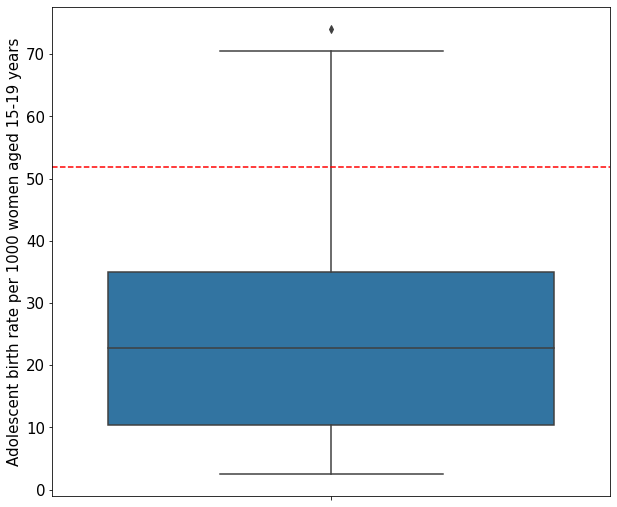

In [9]:
egypt_birth = df_birth[(df_birth['Period'] == 2018) & (df_birth['Location'] == 'Egypt')]['Adolescent birth rate per 1000 women aged 15-19 years'].values

plt.figure(figsize = (10, 9))
fig = sns.boxplot(data = df_birth[df_birth['Period'] == 2018], y = 'Adolescent birth rate per 1000 women aged 15-19 years')
fig.axhline(egypt_birth, linestyle = '--', color = 'r',  )
fig.set_ylabel('Adolescent birth rate per 1000 women aged 15-19 years', fontsize=15);
plt.tick_params(labelsize=15);

Red dashed line represents Egypt
<br>
<br>
We can see from this boxplot of teenage pregnancies in 2018 that Egypt is above the third quantile meaning that a developed country in Africa (Egypt) is still doing poorly compared to most countries from 2018 that are not in Africa.

2. Which country has the most alcohol abuse. We would expect this to be countries like Ireland or as the internet shows Belarus. Is this true or false?

In [ ]:
df_alch = pd.read_csv('/kaggle/input/who-worldhealth-statistics-2020-complete/alcoholSubstanceAbuse.csv')
df_alch.head()
df_alch = df_alch.drop('Indicator', axis = 1)
df_alch.columns = ['Location', 'Period', 'Gender', 'Total (%) of alcohol consumption per capita']
df_alch.head()

First I'd like to see the total alcohol consumption throughout all countries in these past years. My plot will contain the data for both sexes

In [ ]:
fig = px.choropleth(df_alch[df_alch['Gender'] == 'Both sexes'].sort_values(by = 'Period'), locations='Location', color = 'Total (%) of alcohol consumption per capita', animation_frame='Period', hover_name = 'Location', locationmode='country names', color_continuous_scale= 'inferno')
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

It seems that alcohol consumption has decreased throughout the years, we can check to see how much it has. 

Interestingly enough though, alchohol consumption in muslim countries is extremely low, this is most likely because muslims are not allowed to drink alcohol.

In [ ]:
df_alch[df_alch['Gender'] == 'Both sexes'].groupby('Period').mean()

This is surprising, the choropleth plot really made it seem like alcohol consumption was decreasing but it turns out that the consumption stayed around the same the entire time. Perhaps this was because some of the bigger countries went down by over 2% changing the colors of the graph to make it look like alcohol consumption was decreasing

3. What countries provide basic sanitization for the population? Are countries like India doing worse while others in Greece are doing better?

In [ ]:
df_sanit = pd.read_csv('/kaggle/input/who-worldhealth-statistics-2020-complete/atLeastBasicSanitizationServices.csv')
df_sanit = df_sanit.drop('Indicator', axis = 1)
df_sanit.columns = ['Location', 'Period', 'Area', 'Population using Basic Sanitation Services (%)']
df_sanit.head()

In [ ]:
fig = px.choropleth(df_sanit[df_sanit['Area'] == 'Total'].sort_values(by = 'Period'), locations = 'Location', locationmode='country names', color = 'Population using Basic Sanitation Services (%)',animation_frame='Period', color_continuous_scale= 'haline')
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

From 200 to 2017, many countries have improved the percentage of basic sanitization given to the population. South America has improved by on average 10% in the percentage of people getting basic sanitization and the Middle East has improved by over 15% although Sudan is still below 50%. 

India, meanwhile, has increased the percentage of people having basic sanitization by about 43%. In 2017 it has 59.54% of people using basic sanitization which is still low but the rate of improvement that India has is by far one of the best.

In [ ]:
plt.figure(figsize = (11, 8), dpi = 100)
plt.title('Percentage of Rural/Urban/Total population in India with Basic Sanitation Services')
sns.barplot(data = df_sanit[df_sanit['Location'] == 'India'], x = 'Period', y = 'Population using Basic Sanitation Services (%)', hue = 'Area', hue_order=['Rural', 'Urban', 'Total'])

It seems there is a significant different between India's Rural and Urban population when it comes to basic sanitization. While both have been improving at a linear rate (Rural's rate being higher), the Urban Population clearly has much better sanitization reaching about 72% of people having basic sanitization in 2017 compared to the Rural sanitization, reaching barely above 50%.

This actually gives us more insight into what's actually happening in India. India's Rural population is 72.18% of all the people in India (Urban is the rest) so out of most of the population, barely 50% have basic hand sanitization services. The Total (Urban and Rural) does actually account for this but does not express that most of the population is doing worst.

4. Global estimates by WHO indicates that about 30% women worldwide have experienced either physical and/or sexual intimate partner violence in their lifetime. Is this number accurate and has anything changed in the past years?

In [ ]:
df_viol = pd.read_csv('/kaggle/input/who-worldhealth-statistics-2020-complete/eliminateViolenceAgainstWomen.csv')
df_viol = df_viol.drop(['Dim1', 'Indicator'], axis = 1)
df_viol.columns = ['Location', 'Period', 'Age', 'Percentage subjected to Violence by a current or former partner']
df_viol.head()

In [ ]:
fig = px.choropleth(df_viol.sort_values(by = 'Period'), locations = 'Location', locationmode='country names', color = 'Percentage subjected to Violence by a current or former partner', animation_frame='Period', hover_data= ['Age'])
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

Wow, there is barely any data on Percentage of Women subjected to violence. This is weird because if you search up the "Proportion of ever-partnered women and girls aged 15-49 years subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 months" you'll see a result by SDG Indicators saying that, "18% of women are ever-partnered women and girls 15 to 49 years old experienced physical and/or sexual violence by a current or former intimate partner in the 12 months prior to the survey." They use the same exact data as well, but this percententage is a bit misworded. Explained down below.

In [ ]:
print(f"All the countries in the data: {df_viol['Location'].nunique()} \n \n")
print(f"All different countries for each year: \n{df_viol.groupby('Period')['Location'].nunique()}")

So like the SDG indicators show, there are about 106 countries in the data but these countries are over the time period of 17 years and many don't even show up for multiple years.

Also saying that the violence happened in the 12 months prior to the survey makes it look like the data was collected for one year when it clearly was not.

In [ ]:
print("By getting the mean of 'Proportion of ever-partnered women and girls aged 15-49 years subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 months' I can get percentages less than 1 away from the SDG's percent \n \n")
print(f"Assuming age doesn't matter: {round(df_viol['Percentage subjected to Violence by a current or former partner'].mean(), 2)}%")
print(f"Assuming age is in between 15-49: {round(df_viol[df_viol['Age'] == '15-49 years']['Percentage subjected to Violence by a current or former partner'].mean(), 2)}%")

Again though these percentages DO NOT account for the year and make it seem like there were 106 countries giving data in the last 12 months when in reality the data was over a time span of 17 years with at most 35 countries (second greatest had 11 countries) per year not even all from 15-49 years old

I can't tell which one of these percentages they used (I'm assuming they used one of these or at least close) but both are not accurately used. If we're assuming age doesn't matter than they're taking data that overlaps: 20-24, 20-32, 20-49, and getting the mean of all of these percentages. Not to mention there are different amounts of each age range and you can't just average them out. If they are using the second percentage then this is even worst because age 15-49 makes up 13% of the total data when the data is already small enough and  includes even less of the countries spread out over 17 years.

I want to emphasize that I know that millions of women do not report that they have been subjected to violence by a current or former partner, but this percentage on the SDG Indicator is just flat out manipulative and wrong. There is simply not enough data to determine how much women are facing violence in the past year.

Perhaps I don't have all the data as well but the chances of me getting all the same countries plus one and the same exact averages (off by less than 1%) from the same question is pretty low

Okay so I contacted the UN to see if I could get the SDG indicator data that they were using. They responded back to me, so here are my results.

In [ ]:
pip install openpyxl

In [ ]:
df_viol_SDG = pd.read_excel('/kaggle/input/women-violence-sdgdata/Women_Violence_SDG.xlsx', engine = 'openpyxl')
for name in df_viol_SDG.columns:
    if('Unnamed' in name):
        df_viol_SDG = df_viol_SDG.drop(name, axis = 1)
df_viol_SDG = df_viol_SDG.fillna(-5)
Period = []
Violence = []
for i in range(len(df_viol_SDG)):
    for year in df_viol_SDG.columns[12:]:
        if(df_viol_SDG[year].iloc[i] > -5):
            Period.append(year)
            Violence.append(df_viol_SDG[year].iloc[i])

df_viol_SDG['Period'] = pd.DataFrame(Period)
df_viol_SDG['Violence_Against_Women(%)'] = pd.DataFrame(Violence)
for year in df_viol_SDG.columns[12:-2]:
    df_viol_SDG = df_viol_SDG.drop(year, axis = 1)
df_viol_SDG = df_viol_SDG.drop(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription', 'GeoAreaCode', 'Reporting Type', 'Sex', 'Units'], axis = 1)
df_viol_SDG.columns = ['Location', 'Age', 'Nature', 'Period', 'Percentage subjected to Violence by a current or former partner']
df_viol_SDG.head()

Really looks like the same dataset to me but let me do a bit more of analysis just to make sure

In [ ]:
print(df_viol_SDG['Nature'].value_counts(), '\n \n')
print("Note how if we were to take out the E (Estimated Data). We would end up with 558 rows of data, the exact size of the World Health Statistics Data!")

In [ ]:
def age_adder(age):
    if('years' not in age):
        return str(f"{age} years")
    return age
df_viol_SDG['Age'] = df_viol_SDG['Age'].apply(age_adder)
df_viol_SDG = df_viol_SDG[(df_viol_SDG['Nature'] == 'C') | (df_viol_SDG['Nature'] == 'CA')]
df_viol_SDG = df_viol_SDG.drop('Nature', axis = 1)


In [ ]:
def splitter(years):
    if('2011-2012' in years):
        return '2012'
    elif('2013-2014' in years):
        return '2014'
    elif('2014-2015' in years):
        return '2015'
    elif('2015-2016' in years):
        return '2016'
    elif('2016-2017' in years):
        return '2017'
    return years
df_viol_ungrouped = df_viol.copy()
df_viol_ungrouped['Period'] = df_viol['Period'].apply(splitter)

fig = px.choropleth(df_viol_ungrouped[df_viol_ungrouped['Age'] == '15-49 years'].sort_values(by = 'Period'), locations = 'Location', locationmode='country names', color = 'Percentage subjected to Violence by a current or former partner', animation_frame='Period')
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

In [ ]:
fig = px.choropleth(df_viol_SDG[df_viol_SDG['Age'] == '15-49 years'].sort_values(by = 'Period'), locations = 'Location', locationmode='country names', color = 'Percentage subjected to Violence by a current or former partner', animation_frame='Period', hover_data= ['Age'])
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

They're the exact same plot! The only difference is that the World Health Statistics groups some of the years together, but by setting them to the next year (ex: 2011 - 2012 is 2012). Once we change this, we can clearly see that these 2 are the same which means that the SDG did use this data to get the "18% of ever-partnered women and girls 15 to 49 years old experienced physical and/or sexual violence by a current or former intimate partner in the 12 months prior to the survey"

Like I've emphasized already, this is concerning because it means the UN has misworded the explanation of the data to make people think that all the data for percentage against women's violence comes all from 1 year when in reality it comes from 17 years.

5. Ever since the coronavirus, people seem to acknowledge that there is a lack of doctors especially in places like the U.S., is this true and is it just the U.S.A that has a lack of doctors?

In [ ]:
df_doc = pd.read_csv('/kaggle/input/who-worldhealth-statistics-2020-complete/medicalDoctors.csv')
df_doc = df_doc.drop('Indicator', axis = 1)
df_doc.columns = ['Location', 'Period', 'Medical doctors (per 10,000)']
df_doc.head()

In [ ]:
fig = px.choropleth(df_doc.sort_values(by = 'Period'), locations = 'Location', locationmode='country names', color = 'Medical doctors (per 10,000)', animation_frame='Period', range_color=[0,50])
fig.update_layout(height = 450, width = 900, margin=dict(t=0, b=0, l=0, r=0))

In [ ]:
print(f"Average amount of doctors in 2017: {round(df_doc[df_doc['Period'] == 2017]['Medical doctors (per 10,000)'].mean(), 2)}")

America in 2017 has 26.12 doctors per 10,000 which is better than the average. However, this number includes many third world countries like countries in Africa and South America. How about when we actually do a comparison to countries in Europe?

In [ ]:
plt.figure(figsize = (10, 9))
df_first = df_doc[df_doc['Period'] == 2017]
df_first = df_first[(df_first['Location'] == 'Germany') | (df_first['Location'] == 'Austria') | (df_first['Location'] == 'France') | (df_first['Location'] == 'Norway') | (df_first['Location'] == 'United Kingdom of Great Britain and Northern Ireland') | (df_first['Location'] == 'Portugual') | (df_first['Location'] == 'Germany') | (df_first['Location'] == 'United States of America')]
df_first['Location'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK', 'United States of America': 'USA'}, inplace = True)
fig = sns.barplot(data = df_first, x = 'Location', y = 'Medical doctors (per 10,000)')
fig.set_ylabel('Medical doctors (per 10,000)', fontsize=15);
plt.tick_params(labelsize=15);

So compared to countries in Europe, USA clearly has the least amount of doctors while having the greatest population as well which is concerning

In [ ]:
df_year_doc = pd.DataFrame()
df_year_doc = df_doc[(df_doc['Location'] == 'Germany') | (df_doc['Location'] == 'Austria') | (df_doc['Location'] == 'France') | (df_doc['Location'] == 'Norway') | (df_doc['Location'] == 'United Kingdom of Great Britain and Northern Ireland') | (df_doc['Location'] == 'Portugual') | (df_doc['Location'] == 'Germany') | (df_doc['Location'] == 'United States of America')]
df_year_doc['Location'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK', 'United States of America': 'USA'}, inplace = True)

fig, axes = plt.subplots(nrows = 6, figsize = (14,14), dpi = 200)
i = 0
for loc in df_year_doc['Location'].unique():
    sns.barplot(data = df_year_doc[df_year_doc['Location'] == loc], x = 'Period', y = 'Medical doctors (per 10,000)', ax = axes[i])
    axes[i].set(ylabel = loc, ylim = (0,50))
    i = i + 1
fig.text(0.04, 0.5, 'Medical doctors (per 10,000)', va = 'center', rotation = 'vertical', fontsize = 14);

We can see an increase in doctors from some European countries lke Austria, UK, Norway, and Germany. France and USA stay roughly the same in the amount of doctors but France still has more. For a top first world country, America is not doing well at increasing the amount of doctors in the population.

6. NTD's or Neglected tropical diseases are diseases that are neglected and require much more attention to be dealth with (like ebola). These diseases are known to cause illnesses in over one billion people, is this number accurate and are they just located in the world's poorest countries?

In [ ]:
df_NTD = pd.read_csv('/kaggle/input/who-worldhealth-statistics-2020-complete/interventionAgianstNTDs.csv')
df_NTD = df_NTD.drop('Indicator', axis = 1)
df_NTD.columns = ['Location', 'Period', "# of people requiring intervention against NTD's"]
df_NTD.head()

In [ ]:
fig = px.choropleth(df_NTD.sort_values(by = 'Period'), locations = 'Location', locationmode='country names', color = "# of people requiring intervention against NTD's", animation_frame='Period', range_color=[0,10000000], color_continuous_scale= 'oryel')
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

This is a really hard graph to use a choropleth on because the values are so spread out, some lying in the tens while others lie in the millions. 

We can see from this graph that some poorer countries in South America, Africa, and the Middle East have a significantly high problem with STD's with millions of people being infected

STD's are high in China and India as well, with India having an astonishing 697 million people infected with STD's in 2018!

The good news is that lots of these NTD's have decreased by millions sometimes per year especially in places like China, South America, parts of Africa, and India.

However, the opposite also applies. In places like Mexico and other parts of Africa, the amount of NTD's are actually increasing.

In [ ]:
df_NTD_Perc = df_NTD[(df_NTD['Period'] == 2018)]
df_NTD_Perc = df_NTD_Perc[(df_NTD_Perc['Location'] == 'India') | (df_NTD_Perc['Location'] == 'China') | (df_NTD_Perc['Location'] == 'Mexico') | (df_NTD_Perc['Location'] == 'Brazil') | (df_NTD_Perc['Location'] == 'Nigeria') | (df_NTD_Perc['Location'] == 'Indonesia')]

#Going to divide all values by their population
#Brazil
df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[0] = df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[0]/209500000
#China
df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[1] = df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[1]/1393000000
#India
df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[2] = df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[2]/1353000000
#Indonesia
df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[3] = df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[3]/267700000
#Mexico
df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[4] = df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[4]/126200000
#Nigeria
df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[5] = df_NTD_Perc["# of people requiring intervention against NTD's"].iloc[5]/195900000
df_NTD_Perc["# of people requiring intervention against NTD's"] = df_NTD_Perc["# of people requiring intervention against NTD's"]*100

In [ ]:
plt.figure(figsize = (10, 7), dpi = 100)
ax = sns.barplot(data = df_NTD_Perc, x = 'Location', y = "# of people requiring intervention against NTD's")
ax.set(ylabel = "Percentage of people requiring intervention against NTD's (%)", title = "Countries with some of the highest NTD's in 2018 by percentage");

So we can see from the plot that while some countries like Brazil and China have a high amount of people with NTD's it doessn't even make up 5% of either population. This is most definetely not to say that there is no problem as their numbers of people infected are still in the million

Other countries, however, like India, Indonesia, Mexico, and especially Nigeria have a high amount of the population affected with NTD's, Nigeria having over 65% of people infected by NTD's!

NTD's are seriously harmful to people and clearly the world is still living with hundreds of millions of people who have it. We may be able to solve things like poverty by 2050 but the world will still be living with horrible STD's if we don't focus on providing basic sanitiation and battle these dieseases away.

# **That's all I have. Thank you for your time!**